# 1.Introducción

Los gráficos de burbujas son una versión mejorada del gráfico de dispersión. En un gráfico de dispersión, hay dos dimensiones x e y. En un gráfico de burbujas, hay tres dimensiones x, y y z. La tercera dimensión z indica el peso. De este modo, los gráficos de burbujas ofrecen más información visual que un gráfico de dispersión bidimensional.

# 2.Dataset

Para este laboratorio, utilizaremos el conjunto de datos que contiene información sobre la inmigración canadiense. Tiene los datos de 1980 a 2013 e incluye el número de inmigrantes de 195 países.

In [3]:
pip install openpyxl

     -------------------------------------- 250.0/250.0 kB 1.3 MB/s eta 0:00:00
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# Importar los paquetes necesarios y el conjunto de datos

import numpy as np  
import pandas as pd
import os


path = os.path.join('Datasets', 'Canada.xlsx')
df = pd.read_excel(path, sheet_name='Canada by Citizenship',
                    skiprows=range(20),
                    skipfooter=2)
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [5]:
# Eliminamos las columnas que no vamos a utilizar
df = df.drop(columns = ['Type', 'Coverage', 'AREA', 'AreaName', 'REG', 'RegName', 'DEV', 'DevName',])
df.head()

,OdName,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,16,39,39,47,71,340,496,741,828,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,1,0,0,0,0,0,1,2,2,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,80,67,71,69,63,44,69,132,242,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,0,0,0,0,0,0,2,0,0,...,0,0,1,1,0,0,0,0,1,1


In [6]:
# Renombramos OdName por Country
df.rename(columns={'OdName':'Country'}, inplace=True)
df.head()

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,16,39,39,47,71,340,496,741,828,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,1,0,0,0,0,0,1,2,2,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,80,67,71,69,63,44,69,132,242,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,0,0,0,0,0,0,2,0,0,...,0,0,1,1,0,0,0,0,1,1


In [7]:
# Establecemos Country como índice
df = df.set_index('Country')
df.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,16,39,39,47,71,340,496,741,828,1076,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,1,0,0,0,0,0,1,2,2,3,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,80,67,71,69,63,44,69,132,242,434,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,0,1,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
Andorra,0,0,0,0,0,0,2,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [8]:
# Seleccionamos Brasil y Uruguay para nuestro análisis
Uruguay = df.loc['Uruguay']
Brazil = df.loc['Brazil']

# 3.Normalizar los datos

Hay varias formas de normalizar los datos. Normalizamos los datos para que estén en un rango similar. Los datos de inmigración de Uruguay y Brasil tienen rangos diferentes. Necesitaba llevarlos al rango de 0 a 1. Simplemente dividí los datos de Uruguay por el valor máximo de la serie de datos de Uruguay. Hice lo mismo con la serie de datos de Brasil.

In [9]:
# Normalización de los datos
u_normal = Uruguay / Uruguay.max()
b_normal = Brazil / Brazil.max()

In [10]:
# Creamos una lista que nos permita comparar los años
years = list(range(1980, 2014))

# 4.Gráfico de dispersión

Sólo para ver la diferencia, tracemos primero el gráfico de dispersión.

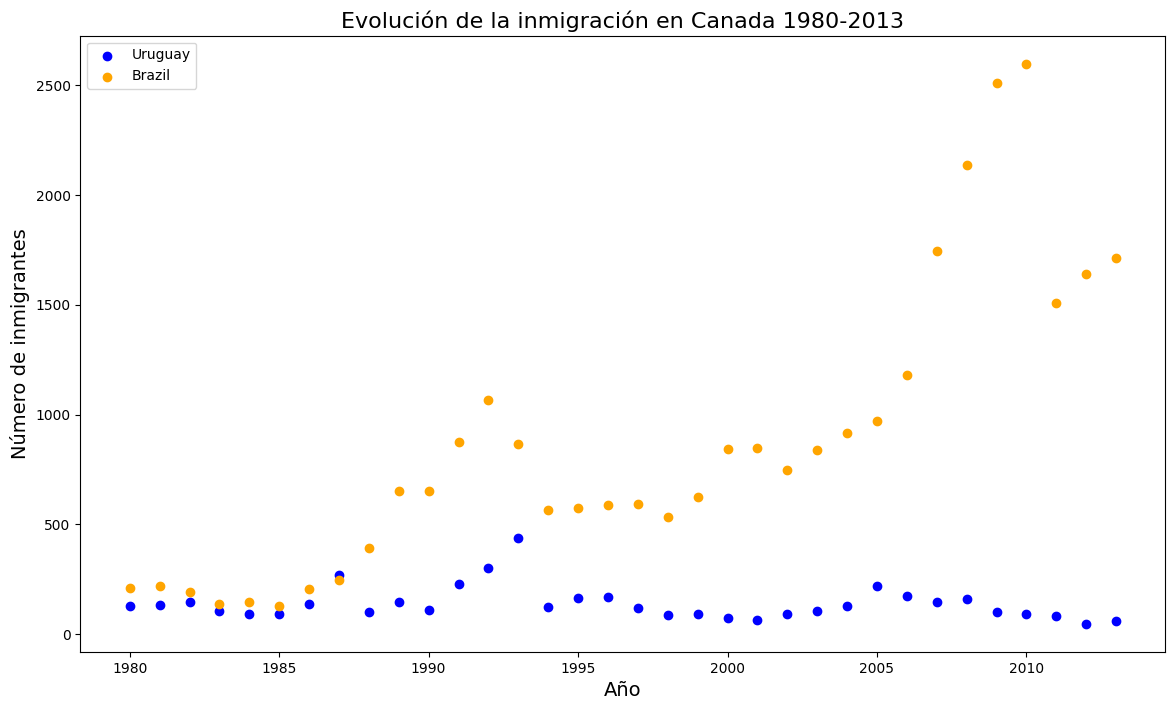

In [11]:
import matplotlib.pyplot as plt
from matplotlib import cm

plt.figure(figsize=(14, 8))
plt.scatter(years, Uruguay, color='blue')
plt.scatter(years, Brazil, color='orange')
plt.title("Evolución de la inmigración en Canada 1980-2013", size=16)
plt.xlabel("Año", size=14)
plt.ylabel("Número de inmigrantes", size=14)
plt.legend(('Uruguay', 'Brazil'), loc="upper left")
plt.show()

# 5.Gráfico de burbujas

Text(0, 0.5, 'Número de inmigrantes')

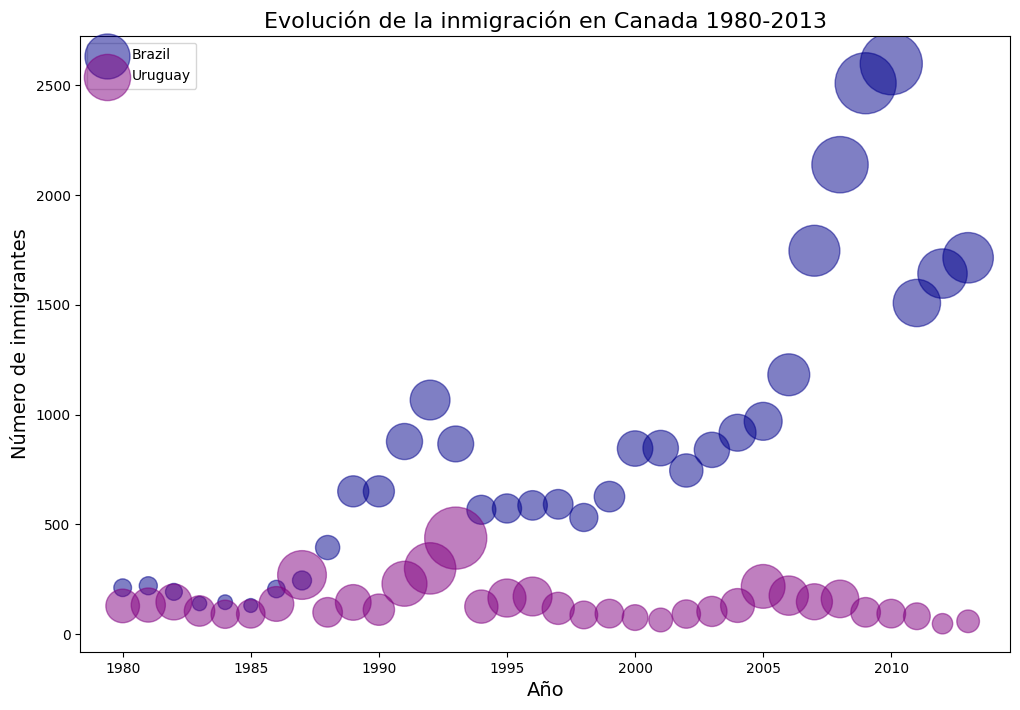

In [12]:
plt.figure(figsize=(12, 8))
plt.scatter(years, Brazil, 
                  color='darkblue', 
                 alpha=0.5,
                 s = b_normal * 2000)
plt.scatter(years, Uruguay, 
                  color='purple', 
                 alpha=0.5,
                 s = u_normal * 2000,
                 )
plt.title("Evolución de la inmigración en Canada 1980-2013", size=16)
plt.xlabel("Año", size=14)
plt.legend(('Brazil','Uruguay'), loc="upper left")
plt.ylabel("Número de inmigrantes", size=14)

Podemos hacernos una idea del número de inmigrantes por el tamaño de las burbujas. Cuanto más pequeñas sean las burbujas, menor será el número de inmigrantes.

También podemos hacer que este gráfico sea multicolor. Para que tenga un poco de sentido, necesitamos que las series de datos estén ordenadas.

In [13]:
# Ordenamos las series de datos por países
c_br = sorted(Brazil)
c_uy = sorted(Uruguay)

Text(0, 0.5, 'Número de inmigrantes')

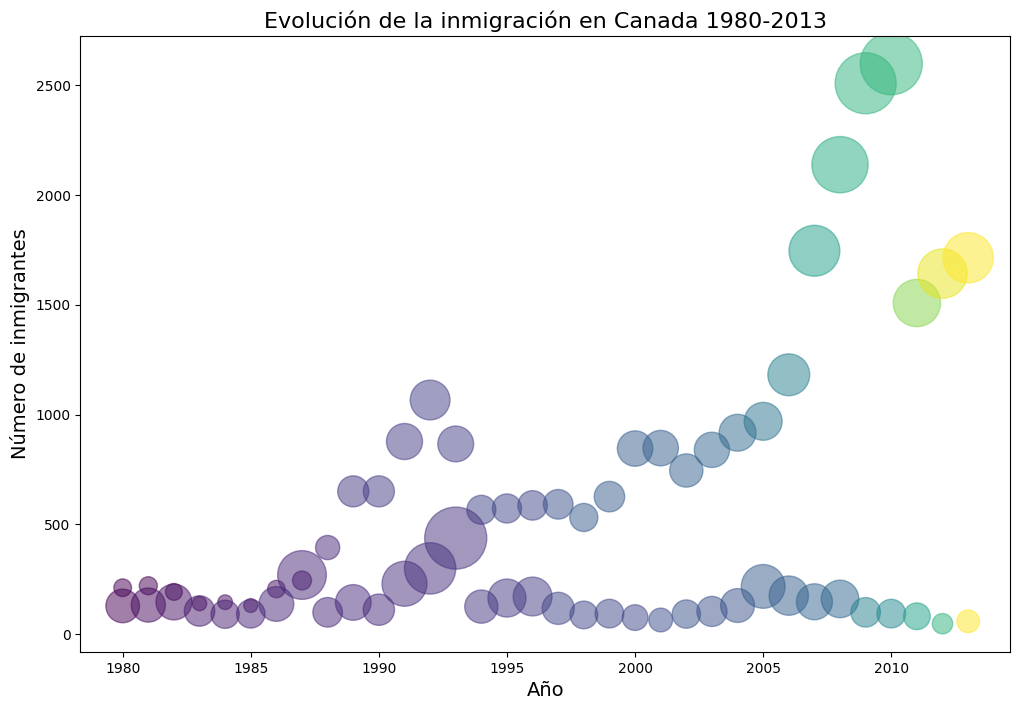

In [14]:
# Ahora pasaremos estos valores para cambiar los colores
plt.figure(figsize=(12, 8))
plt.scatter(years, Brazil, 
                  c=c_br,
                 alpha=0.5,
                 s = b_normal * 2000)
plt.scatter(years, Uruguay, 
                  c=c_uy,
                 alpha=0.5,
                 s = u_normal * 2000,
                 )
plt.title("Evolución de la inmigración en Canada 1980-2013", size=16)
plt.xlabel("Año", size=14)
plt.ylabel("Número de inmigrantes", size=14)

Ahora añadimos otra dimensión, el color. El color cambia según el número de inmigrantes. Pero no es tan bueno cuando estamos trazando dos variables. Porque en este proceso no definimos explícitamente el color para las variables individuales. Pero hace un buen trabajo cuando trazamos una variable en el eje y. Vamos a trazar el número de inmigrantes de Brasil por año para ver la tendencia a lo largo de los años.

Text(0, 0.5, 'Número de inmigrantes')

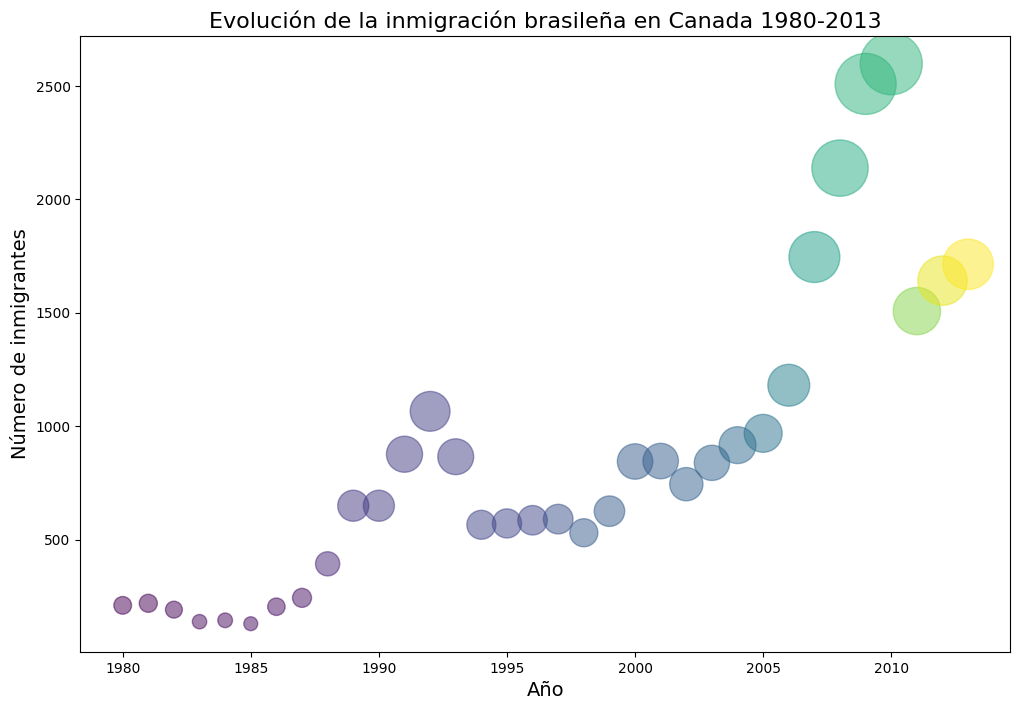

In [15]:
plt.figure(figsize=(12, 8))
plt.scatter(years, Brazil,
            c=c_br,
            alpha=0.5,
            s = b_normal * 2000)
plt.title("Evolución de la inmigración brasileña en Canada 1980-2013", size=16)
plt.xlabel("Año", size=14)
plt.ylabel("Número de inmigrantes", size=14)

# 6.Ejercicio

Realiza un gráfico de burbujas con los países del Mercosur con los siguientes colores: Argentina (blue), Brazil (green), Paraguay (red) y Uruguay (c).

In [26]:
Argentina = df.loc['Argentina']
Paraguay = df.loc['Paraguay']

In [27]:
a_normal = Argentina / Argentina.max()
p_normal = Paraguay / Paraguay.max()

In [22]:
c_ar = sorted(Argentina)

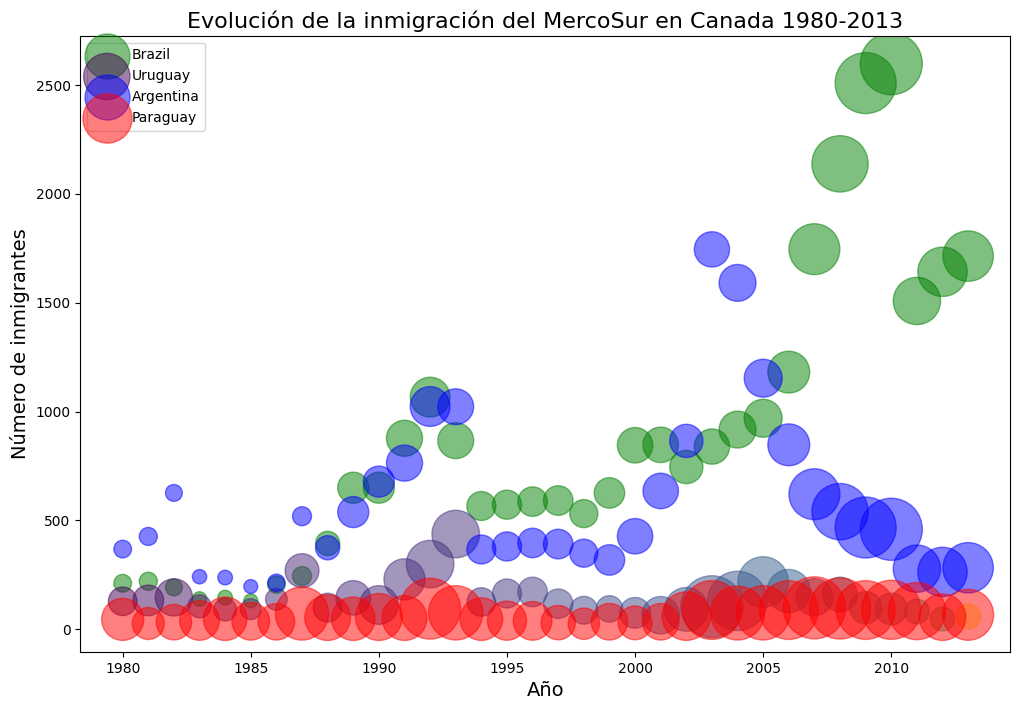

In [29]:
plt.figure(figsize=(12, 8))
plt.scatter(years, Brazil,
                color='green',
                alpha=0.5,
                 s = b_normal * 2000)
plt.scatter(years, Uruguay,
                c=c_uy,
                alpha=0.5,
                 s = u_normal * 2000,
                )
plt.scatter(years, Argentina,
                color='blue',
                alpha=0.5,
                s= b_normal * 2000,
                )
plt.scatter(years, Paraguay,
                color='red',
                alpha=0.5,
                s= p_normal * 2000
)
plt.title("Evolución de la inmigración del MercoSur en Canada 1980-2013", size=16)
plt.xlabel("Año", size=14)
plt.ylabel("Número de inmigrantes", size=14)
plt.legend(('Brazil','Uruguay','Argentina','Paraguay'), loc="upper left")